In [343]:
def drop_module(dir):
    import sys
    """Drop module from sys modules"""
    if dir in sys.modules:
        del sys.modules[dir]
        print("Libreria actualizada")

# Librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.plot_grid import PlotGrid
import random
import copy

# Inicializando variables

Matriz de recompensa

In [519]:
reward =  [-10,-1,-1,-1]  + \
        [-1,-1,-1,-1] + \
        [-5,-1,-1,-1] + \
        [-1,-1,-1,1]
        
reward
dimension_x = 4
dimension_y = 4
no_action_value = -10 

In [520]:
ploter = PlotGrid(dimension_x,dimension_y)

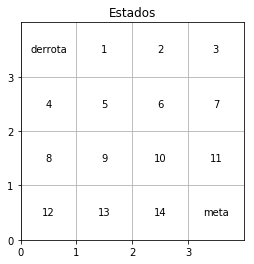

In [4]:
num_states = 16
states = list(range(16))
states[0]="derrota"
states[15]="meta"
ploter.drawGrid(states,"Estados")

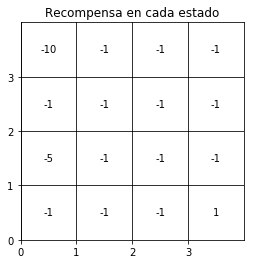

In [521]:

ploter.drawGrid(reward,"Recompensa en cada estado")

In [31]:
def get_state_from_x_y(x,y):
    return (y-1)*dimension_x + x -1
def get_reward(x,y):
    return  reward[get_state_from_x_y(x,y)]

In [46]:
def get_state_from_number(number):
    return (number%4) +1,int(np.floor(number/dimension_x)) +1

In [33]:
def get_all_posibilities_movents(x,y):
    # actions up, down, left, right
    actions = [1,1,1,1]
    if(x==1):
        actions[2] = 0
    if(x==dimension_x):
        actions[3] = 0
    if(y==1):
        actions[0] = 0
    if(y==dimension_y):
        actions[1] = 0
    return actions

In [522]:
def generate_all_samples():
    x_array = []
    y_array = []
    y_states = []
    terminal_states = []
    for x in range(1, dimension_x+1):
        for y in range(1, dimension_y+1):
            x_array.append([x, y])
            terminal_states.append(False)
            movements = get_all_posibilities_movents(x,y)
            y_s = []
            if(movements[0] == 1):
                y_s.append(get_reward(x,y-1))
            else:
                y_s.append(no_action_value)
            if(movements[1] == 1):
                y_s.append(get_reward(x,y+1))
            else:
                y_s.append(no_action_value)
            if(movements[2] == 1):
                y_s.append(get_reward(x - 1,y))
            else:
                y_s.append(no_action_value)
            if(movements[3] == 1):
                y_s.append(get_reward(x+1,y))
            else:
                y_s.append(no_action_value)
            y_array.append(y_s)
            y_states.append([[x, y-1],[x, y+1],[x-1, y],[x+1, y]])
    terminal_states[-1] = True
    return x_array, y_array, y_states, terminal_states

In [523]:
X, Y, YS, TS = generate_all_samples()
X = np.array(X).astype(np.float)
Y = np.array(Y).astype(np.float)
YS = np.array(YS).astype(np.float)
TS = np.array(TS).astype(np.float)
Y[TS==True] = 0

In [524]:
from tensorflow.keras.models import load_model
from itertools import product
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
import time
from tensorflow import keras
import pandas as pd
import numpy as np

In [525]:
model = Sequential()
model.add(Dense(56,input_shape=(2,)))
model.add(Dense(128))
model.add(Dense(256))
model.add(Dense(4, activation=None))
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics=['mape'] )

In [526]:
drop_module("utils.dqn_wrapper")
from utils.dqn_wrapper import DQNWrapper

Libreria actualizada


In [527]:
dqn = DQNWrapper(model, 0.99)

In [528]:
y, ys = dqn.train(X,Y,YS, TS, num_qt_update=50, num_batch=1, epochs=3000)

In [529]:
y

array([[-10.,  -1., -10.,  -1.],
       [-10.,  -5., -10.,  -1.],
       [ -1.,  -1., -10.,  -1.],
       [ -5., -10., -10.,  -1.],
       [-10.,  -1., -10.,  -1.],
       [ -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -5.,  -1.],
       [ -1., -10.,  -1.,  -1.],
       [-10.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.],
       [ -1., -10.,  -1.,   1.],
       [-10.,  -1.,  -1., -10.],
       [ -1.,  -1.,  -1., -10.],
       [ -1.,   1.,  -1., -10.],
       [  0.,   0.,   0.,   0.]])

In [530]:
ys

array([[-15.63245201,  -5.09197712, -14.79268503,  -5.40270948],
       [-15.21231937,  -7.97163367, -13.6723423 ,  -5.51161098],
       [ -5.09197712,  -2.85128987, -12.55199885,  -4.39126587],
       [ -7.97163367, -10.73094672, -11.43165624,  -3.27092481],
       [-13.88117528,  -5.51161098, -15.21231937,  -3.65143156],
       [ -5.40270948,  -4.39126587,  -5.09197712,  -4.17296529],
       [ -5.51161098,  -3.27092481,  -7.97163367,  -4.69450068],
       [ -4.39126587, -10.65105319,  -2.85128987,  -2.44417286],
       [-12.12989521,  -4.17296529,  -5.40270948,  -1.90015215],
       [ -3.65143156,  -4.69450068,  -5.51161098,  -2.42168844],
       [ -4.17296529,  -2.44417286,  -4.39126587,  -2.19570959],
       [ -4.69450068,  -8.53053999,  -3.27092481,   1.67633986],
       [-10.37861755,  -2.42168844,  -3.65143156,  -9.14887261],
       [ -1.90015215,  -2.19570959,  -4.17296529,  -9.3846224 ],
       [ -2.42168844,   1.67633986,  -4.69450068,  -7.85375309],
       [  0.        ,   0

In [531]:
def get_action_value(q_model) :
    return { ind: { "arriba":el[0],"abajo":el[1],"izquierda":el[2],"derecha":el[3] }for ind, el in enumerate(q_model.predict(np.array([get_state_from_number(x) for x in range(num_states)])))}
def get_state_value(q_model):
    return list(map(lambda el:"%.2f" % el, np.max(q_model.predict(np.array([get_state_from_number(x) for x in range(num_states)])), axis=1)))

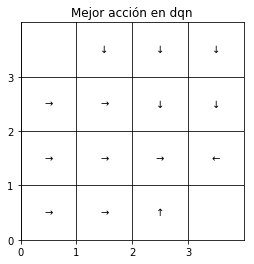

In [532]:
ploter.printActionValue( get_action_value(dqn.q_model),
                        "dqn")

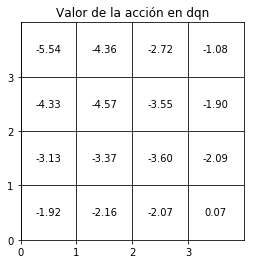

In [533]:
ploter.drawGrid(
                    get_state_value(dqn.q_model),
                    "Valor de la acción en {}".format("dqn")
            )

In [512]:
dqn.q_model.predict([[4,3]])

array([[-2.728674  , -2.6895843 , -0.08175492, -4.698032  ]],
      dtype=float32)

In [488]:
X[14]

array([4., 3.])

In [513]:
Y[14]

array([ -1.,   1.,  -1., -15.])

In [514]:
ys[14]

array([ -1.98766881,   2.56785941,  -4.55682516, -11.52345037])

In [518]:
dqn.q_model.predict([[4,4]])

array([[ 1.2519698, -4.0672164,  1.6727118, -3.2390304]], dtype=float32)

In [487]:
YS[14]

array([[4., 2.],
       [4., 4.],
       [3., 3.],
       [5., 3.]])

In [361]:
np.max(dqn.q_model.predict(np.array([get_state_from_number(x) for x in range(num_states)])), axis=1)

array([-2.9638293, -2.9381154, -2.2436824, -1.5492485, -2.9094288,
       -5.3533826, -5.174493 , -3.117013 , -2.8550274, -5.2989817,
       -5.408047 , -2.6585083, -2.8006253, -3.7852418, -2.6133049,
       -1.441366 ], dtype=float32)

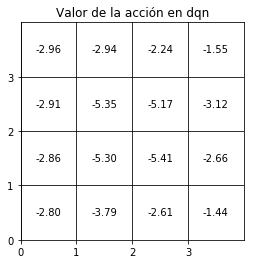

In [314]:
model.fit(x=X[:1], y = Y[:1], epochs=200, verbose=0)
model2 = keras.models.clone_model(model)
model2.set_weights(model.get_weights())
model.fit(x=X[:1], y = Y[:1], epochs=200, verbose=0)
display(model2.predict(X[:1]))
model.predict(X[:1])

array([[-15.097966 ,  -1.0606675, -15.097133 ,  -1.0236334]],
      dtype=float32)

array([[-15.106459 ,  -1.0583744, -15.1047735,  -1.016776 ]],
      dtype=float32)

In [322]:
model.predict(YS[0])

array([[ -9.671079  ,  -0.5923234 ,  -9.848138  ,  -0.62364554],
       [-20.541843  ,  -1.5244255 , -20.361408  ,  -1.409906  ],
       [ -9.729118  ,  -0.72390926,  -9.572611  ,  -0.6119662 ],
       [-20.4838    ,  -1.3928399 , -20.636932  ,  -1.4215856 ]],
      dtype=float32)

In [337]:
Y+(0.1*np.array([np.max(model.predict(ys),axis=1) for ys in YS]))

array([[-15.05923234,  -1.1409906 , -15.06119662,  -1.139284  ],
       [-10.1016776 ,  -5.1803036 , -15.10050966,  -1.18147153],
       [ -1.1409906 ,  -1.21961665, -15.13982265,  -1.22078457],
       [ -5.1803036 , -15.2589297 , -15.17913568,  -1.26009759],
       [-15.09267888,  -1.18147153, -10.1016776 ,  -1.17273055],
       [ -1.139284  ,  -1.22078457,  -1.1409906 ,  -1.21933568],
       [ -1.18147153,  -1.26009759,  -5.1803036 ,  -1.26126552],
       [ -1.22078457, -15.29941067,  -1.21961665,  -1.30057856],
       [-15.12612544,  -1.21933568,  -1.139284  ,  -1.2061771 ],
       [ -1.17273055,  -1.26126552,  -1.18147153,  -1.25278214],
       [ -1.21933568,  -1.30057856,  -1.22078457,  -1.29938731],
       [ -1.26126552, -15.33989164,  -1.26009759,   0.65894055],
       [-15.15957196,  -1.25278214,  -1.17273055, -15.23962362],
       [ -1.2061771 ,  -1.29938731,  -1.21933568, -15.28622875],
       [ -1.25278214,   0.65894055,  -1.26126552, -15.33283386],
       [ -1.29938731, -15

In [315]:
model2.set_weights(model.get_weights())
display(model2.predict(X[:1]))
model.predict(X[:1])

array([[-15.106459 ,  -1.0583744, -15.1047735,  -1.016776 ]],
      dtype=float32)

array([[-15.106459 ,  -1.0583744, -15.1047735,  -1.016776 ]],
      dtype=float32)

In [98]:
model.fit()

<bound method Model.fit of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fade53b9668>>

# Inicializando la red neuronal

# Inicializando la función accion valor

Las posibles acciones son:

- Arriba
- Abajo
- Derecha
- Izquierda

In [6]:
#Acciones disponibles
actions = ["arriba","abajo","derecha","izquierda"]
#Tamano de los estados
states = range(len(reward))
#Por cada estado inicializando su valor en 0
action_value = {state:{action:0 for action in actions} for state in states}

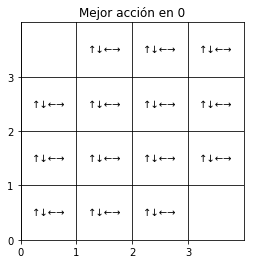

In [7]:
ploter.printActionValue(action_value=action_value)

# Definiendo la función E-Greedy

In [8]:
#Probabilidad de elegir una acción no greedy
epsilon = 0.1 
#Definiendo la funcion Greedy
def get_action_e_greedy(state,dimension_x,dimension_y):
    
    x = state%4
    y = int(np.floor(state/4))
    actions_ava = action_value[state].keys()
    
    if(x == 0):
        actions_ava = actions_ava - set(["izquierda"])
        action_value[state]["izquierda"] = action_value[state]["izquierda"] -1
    if(x == dimension_x -1 ):
        actions_ava = actions_ava - set(["derecha"])
        action_value[state]["derecha"] = action_value[state]["derecha"] -1
    if(y == 0):
        actions_ava = actions_ava - set(["arriba"])
        action_value[state]["arriba"] = action_value[state]["arriba"] -1
    if(y == dimension_y - 1):
        actions_ava = actions_ava - set(["abajo"])
        action_value[state]["abajo"] = action_value[state]["abajo"] -1
        
    action_greedy = max(actions_ava ,key = lambda valor: action_value[state][valor])
    
    if random.random() <= epsilon:
        action_greedy = list(actions_ava - set(action_greedy))[random.randint(0,len(actions_ava) - 2 )]
    return action_greedy,action_value[state][action_greedy]

# Obtener el estado resultante de una acción

In [9]:
import operator
def getState(state,action,dimension_x,dimension_y):
    
    if(action == "arriba"):
        state = state - dimension_x
    if(action == "abajo"):
        state = state + dimension_x
    
    if(action == "izquierda"):
        state = state - 1
    if(action == "derecha"):
        state = state + 1
    return state  

In [10]:
gamma = 0.99
alpha=0.1
          
def maxQas(state_apostrofe):
    return max(action_value[state_apostrofe].values())

In [11]:
counter = 0
array_grids = []

In [12]:
state = random.randint(a=0,b=len(reward) - 2)
for i in range(2400):
    state = random.randint(a=0,b=len(reward) - 2)
    if(counter%400 == 0):
        array_grids.append({"action_value":copy.deepcopy(action_value),"counter":counter})
        
    action,value = get_action_e_greedy(state,dimension_x,dimension_y)
    new_state = getState(state,action,dimension_x,dimension_y)
    maxq = maxQas(new_state)
    reward_v = reward[new_state]
    new_q = action_value[state][action] + alpha*(reward_v+(gamma*maxq) - action_value[state][action])
    action_value[state][action] = new_q
    state = new_state
    counter+=1

array_grids.append({"action_value":copy.deepcopy(action_value),"counter":counter})

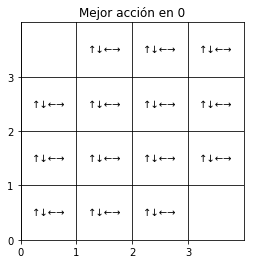

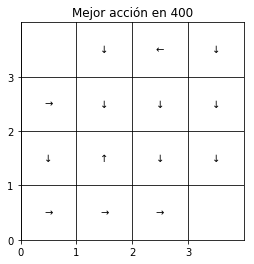

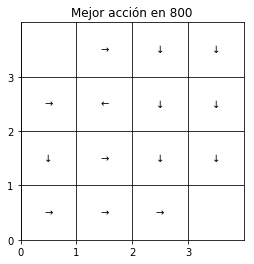

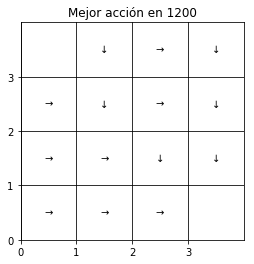

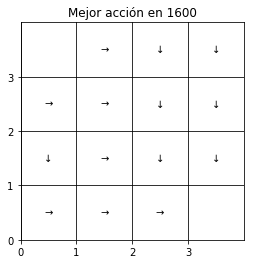

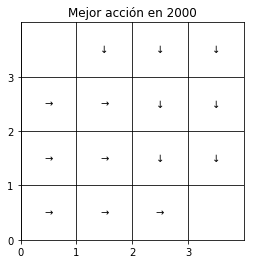

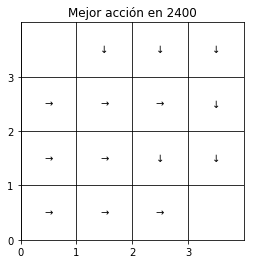

In [13]:
for grid_s in array_grids:
    ploter.printActionValue(grid_s["action_value"],grid_s["counter"])

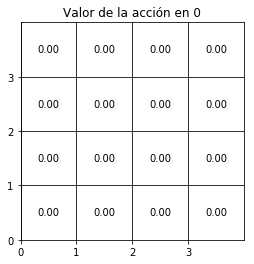

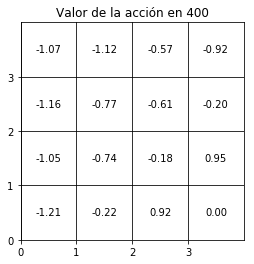

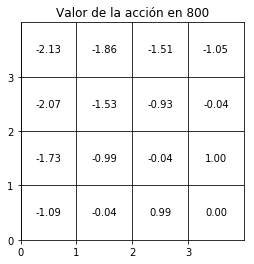

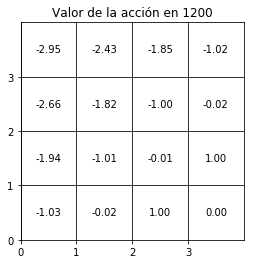

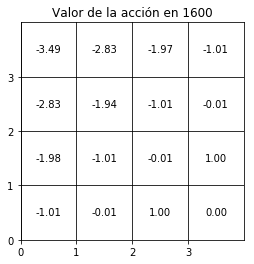

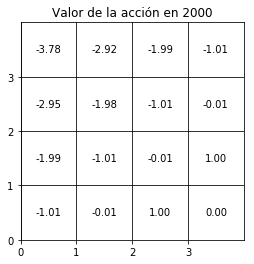

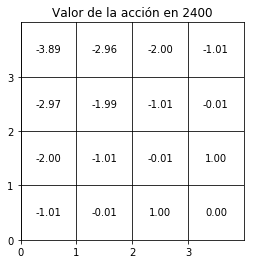

In [14]:
for grid_s in array_grids:
    ploter.drawGrid(
                    list(map(lambda el:"%.2f" % max(el[1].values()), grid_s["action_value"].items())),
                    "Valor de la acción en {}".format(grid_s["counter"])
            )

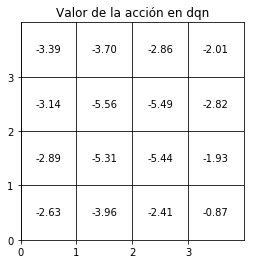

In [417]:
ploter.drawGrid(
                    list(map(lambda el:"%.2f" % el, np.max(dqn.q_model.predict(np.array([get_state_from_number(x) for x in range(num_states)])), axis=1))),
                    "Valor de la acción en {}".format("dqn")
            )